In [1]:
# for mathematical operations
import numpy as np

# for dataframe operations
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Inspect the dataframe's columns, shapes, variable types etc

In [3]:
## Extract columns 
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [4]:
## To find number of dimensions
df.shape

(25, 2)

In [5]:
##calculating some statistical data like percentile, mean, std, count, max and min of the DataFrame.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
## To get summary of a DataFrame. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


### Data Preparation

In [24]:
# showing only column-wise Null value in detail from highest to lowest in percentage

all_data_na = (df.isnull().sum() / len(df)) * 100

# finding null value containing column by droping all non-null containing column
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False) 

missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio


### Data visualization

Features:

x=data['Hours']

y=data['Scores']

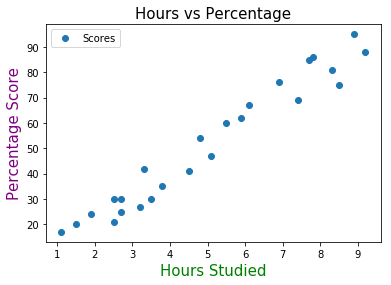

In [7]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage',fontsize = 15)  
plt.xlabel('Hours Studied',fontsize = 15,color='Green')  
plt.ylabel('Percentage Score',fontsize = 15,color='Purple')  
plt.show()

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


C:\Users\abhis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


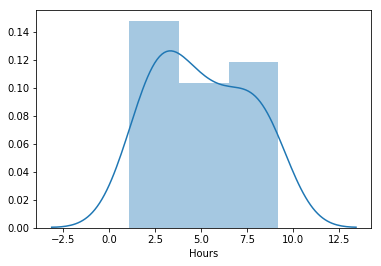

In [9]:
sns.distplot(df["Hours"])# to dectect outliers
plt.show()

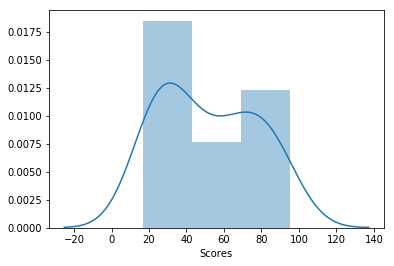

In [10]:
sns.distplot(df["Scores"])# to dectect outliers
plt.show()

### Preparing the data 

In [11]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 
print(X.shape,y.shape)

(25, 1) (25,)


In [12]:
# Divide data into train and test
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42) 
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(20, 1) (20,)
(5, 1) (5,)


### Model Building

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train,y_train)

print("Training complete.")

Training complete.


In [14]:
## To get Adjusted R-square
r2 = lr.score(x_train,y_train)
n = x_train.shape[0]

p = x_train.shape[1]

adj_r = 1-(1-r2)*(n-1)/(n-p-1)
adj_r

0.9462943230606883

#####  Fitted Regression model 
 As per equation: $\hat{y}= b_{0}+b_{1}x$

In [15]:
result=pd.DataFrame({"Hours":[ lr.coef_,lr.intercept_,lr.score(x_train,y_train),adj_r]})

result.rename(index={0:"coefficient",1:"Intercept",2:"R-squared",3:"Adjusted R-squared"})

,Hours
coefficient,[9.682078154455697]
Intercept,2.82689
R-squared,0.949121
Adjusted R-squared,0.946294


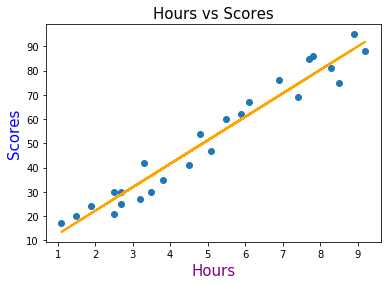

In [16]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_
plt.title('Hours vs Scores',fontsize = 15)

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,lw=2,c="Orange");
plt.xlabel("Hours",fontsize = 15,color='Purple')
plt.ylabel("Scores",fontsize = 15,color='Blue')
plt.show()


In [17]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print('r2_score y_train_pred: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('r2_score y_test_pred: ',r2_score(y_true=y_test,y_pred=y_test_pred))

r2_score y_train_pred:  0.9491209376364416
r2_score y_test_pred:  0.9678055545167994


In [18]:
# Comparing Actual vs Predicted
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})  
df1 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### Predicted score if a student studies for 9.25 hrs/ day? 

In [19]:
x=pd.DataFrame([9.25])
pre= lr.predict(x)
pre

array([92.38611528])

In [20]:
summary = pd.DataFrame({'Hours':9.25, 'Predicted Score': pre})  
summary
summary.rename(index={0:''})

,Hours,Predicted Score
,9.25,92.386115


### Performance of regression model

In [21]:
# calculate Residuals 
df1['Residuals']=df1['Actual']-df1['Predicted']
df1

,Actual,Predicted,Residuals
0,81,83.188141,-2.188141
1,30,27.032088,2.967912
2,21,27.032088,-6.032088
3,76,69.633232,6.366768
4,62,59.951153,2.048847


In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error: 3.9207511902099244
